<a href="https://colab.research.google.com/github/belhiibeng/dementia-classification/blob/main/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
train_data = pd.read_csv('/content/drive/MyDrive/Dementia Classification/oasis_longitudinal.csv', index_col='MRI ID')
test_data = pd.read_csv('/content/drive/MyDrive/Dementia Classification/oasis_cross-sectional.csv', index_col='ID')

In [ ]:
# Select target columns
target_cols = ['CDR']

In [ ]:
# Select feature columns
feature_cols = ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV']

In [ ]:
# Keep selected columns only
selected_cols = feature_cols + target_cols
train_data = train_data[selected_cols].copy()
test_data = test_data[selected_cols].copy()

In [ ]:
# Remove rows with missing value
train_data.dropna(axis=0, inplace=True)
test_data.dropna(axis=0, inplace=True)

In [ ]:
# Seperate target from predictors
X = train_data[feature_cols].copy()
X_test = test_data[feature_cols].copy()
y = train_data['CDR'].apply(str)
y_test = test_data['CDR'].apply(str)

In [ ]:
# Encoding for categorical data
encoder = LabelEncoder()
X['M/F'] = encoder.fit_transform(X['M/F'])
X_test['M/F'] = encoder.transform(X_test['M/F'])

In [ ]:
# Define and fit the model
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X, y)

GradientBoostingClassifier(random_state=0)

In [ ]:
# Get predictions
predictions = clf.predict(X_test)

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'ID': X_test.index,
                       'Predicted Label': predictions,
                       'True Label':y_test})
output.to_csv('/content/drive/MyDrive/Dementia Classification/predictions.csv', index=False)

Confusion Matrix:


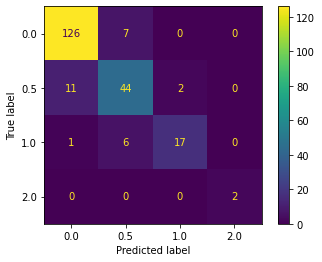


Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       133
         0.5       0.77      0.77      0.77        57
         1.0       0.89      0.71      0.79        24
         2.0       1.00      1.00      1.00         2

    accuracy                           0.88       216
   macro avg       0.89      0.86      0.87       216
weighted avg       0.87      0.88      0.87       216



In [ ]:
# Evaluate the model
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
print("Confusion Matrix:")
plt.show()
clr = classification_report(y_test, predictions)
print("\nClassification Report:\n", clr)